In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
DATASET_LOCATION = "../datasets/large-imc21/split-rtt-files"

In [3]:
def plot_cdf(latency_vals, site_ids, title):
    plt.rcParams.update({'font.family': 'sans-serif'})
    plt.rcParams.update({'font.sans-serif': 'Helvetica'})
    plt.rcParams.update({'font.size': 14})
    fig, ax = plt.subplots(figsize=(20,17))
    for site_name in site_ids:
        plot_values = latency_vals[site_name].copy()
        plot_values = sorted(plot_values)

        y_vals = np.arange(len(plot_values))/float(len(plot_values)-1)

        plt.plot(plot_values, y_vals, label=site_name)

    plt.yticks(ticks=np.arange(0, 1.1, 0.1))
    plt.grid(alpha=0.7, linestyle=':')
    plt.legend()
    plt.ylabel("Cumulative probability")
    plt.xlabel("Latency (ms)")
    plt.title(title)
    fig.tight_layout()

    plt.show()
    #plt.savefig(filename, dpi=600)
    #plt.cla()
    #plt.close(fig)

RTT statistics to site ID beijing-cmcc-2
count    42676.000000
mean        16.386155
std         13.878737
min          0.000000
25%          7.266100
50%          9.152000
75%         21.696075
max        245.829300
Name: rtt, dtype: float64
RTT statistics to site ID beijing-telecom
count    42677.000000
mean        13.496270
std         13.199737
min          3.036400
25%          4.628600
50%          6.449000
75%         19.689900
max        143.329300
Name: rtt, dtype: float64
RTT statistics to site ID beijing-unicom
count    42699.000000
mean        12.209078
std         12.884960
min          0.000000
25%          3.628000
50%          5.441100
75%         18.183100
max        279.234900
Name: rtt, dtype: float64
RTT statistics to site ID beijing-unicom-2
count    42700.000000
mean        13.418450
std         13.203962
min          3.187300
25%          4.531200
50%          6.178250
75%         19.996500
max        121.383300
Name: rtt, dtype: float64
RTT statistics to site ID

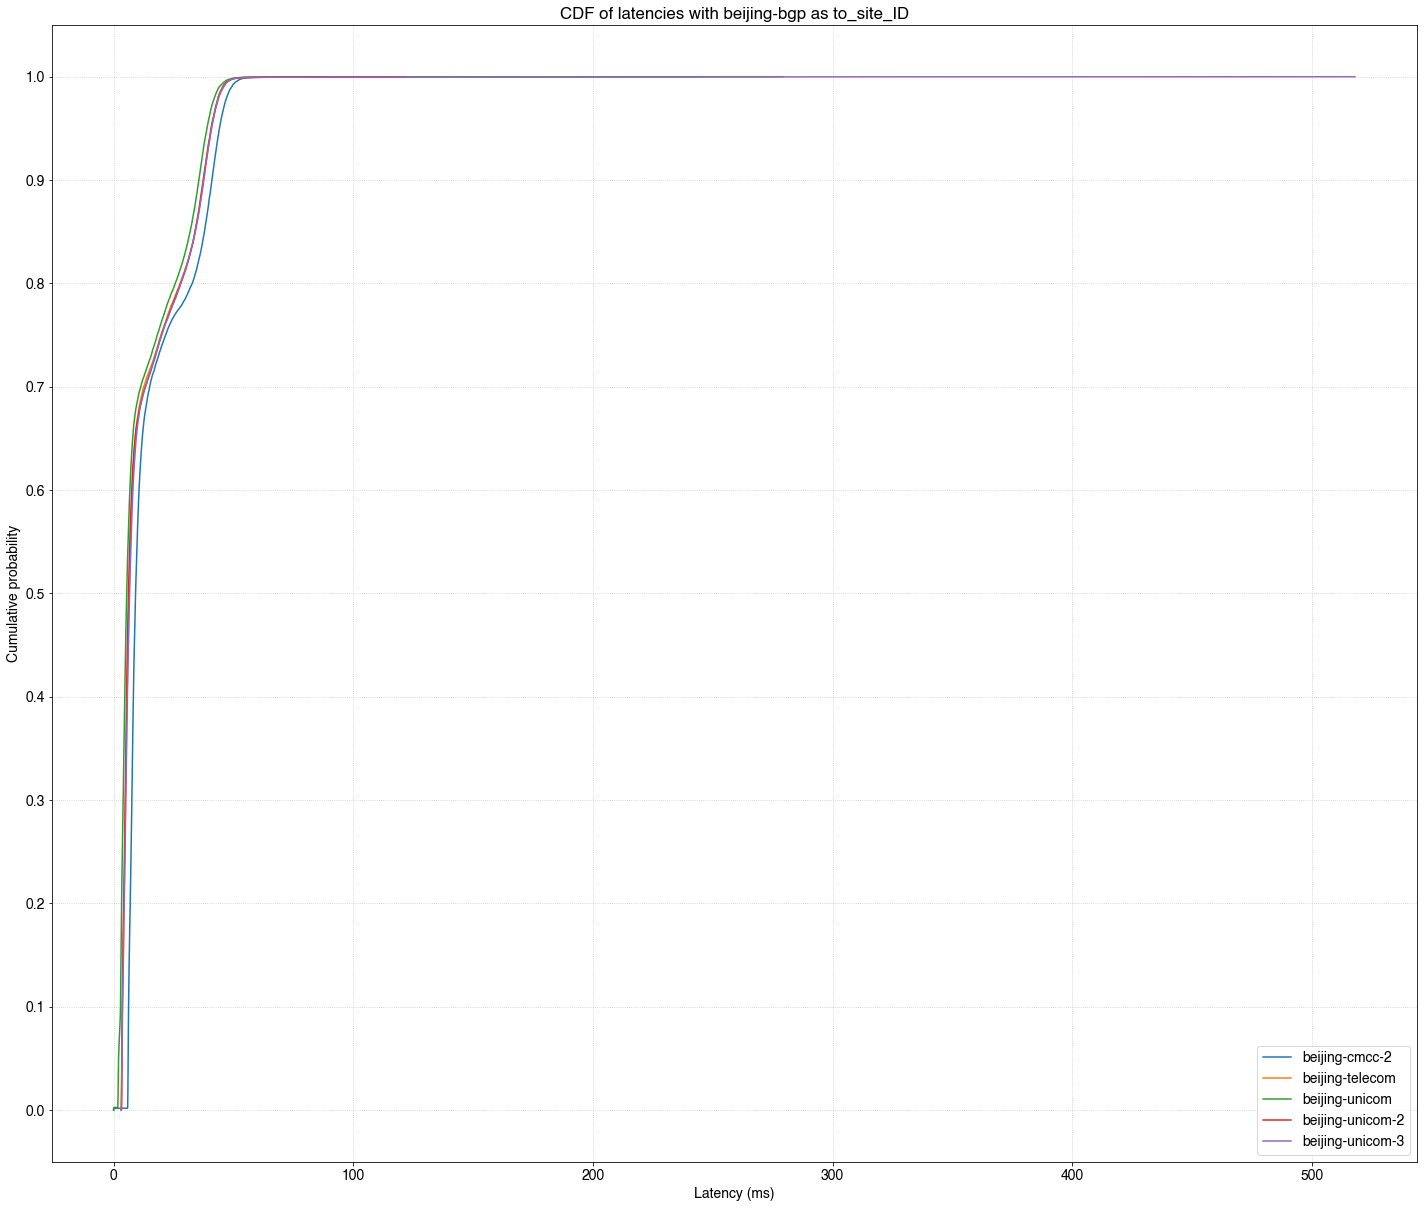



*********************************
beijing-bgp as to_site_id
RTT statistics to site ID beijing-cmcc-2
count    43122.000000
mean         9.292097
std          3.460578
min          5.369800
25%          7.726100
50%          8.877500
75%         10.323425
max        366.462400
Name: rtt, dtype: float64
RTT statistics to site ID beijing-telecom
count    43194.000000
mean         6.135642
std          2.466684
min          3.078100
25%          4.624325
50%          5.650700
75%          7.135500
max         94.118200
Name: rtt, dtype: float64
RTT statistics to site ID beijing-unicom
count    43086.000000
mean         5.132832
std          2.800932
min          1.664200
25%          3.764025
50%          4.753400
75%          6.065650
max        266.302600
Name: rtt, dtype: float64
RTT statistics to site ID beijing-unicom-2
count    43197.000000
mean         5.975456
std          1.948618
min          3.110400
25%          4.784900
50%          5.589800
75%          6.789500
max        

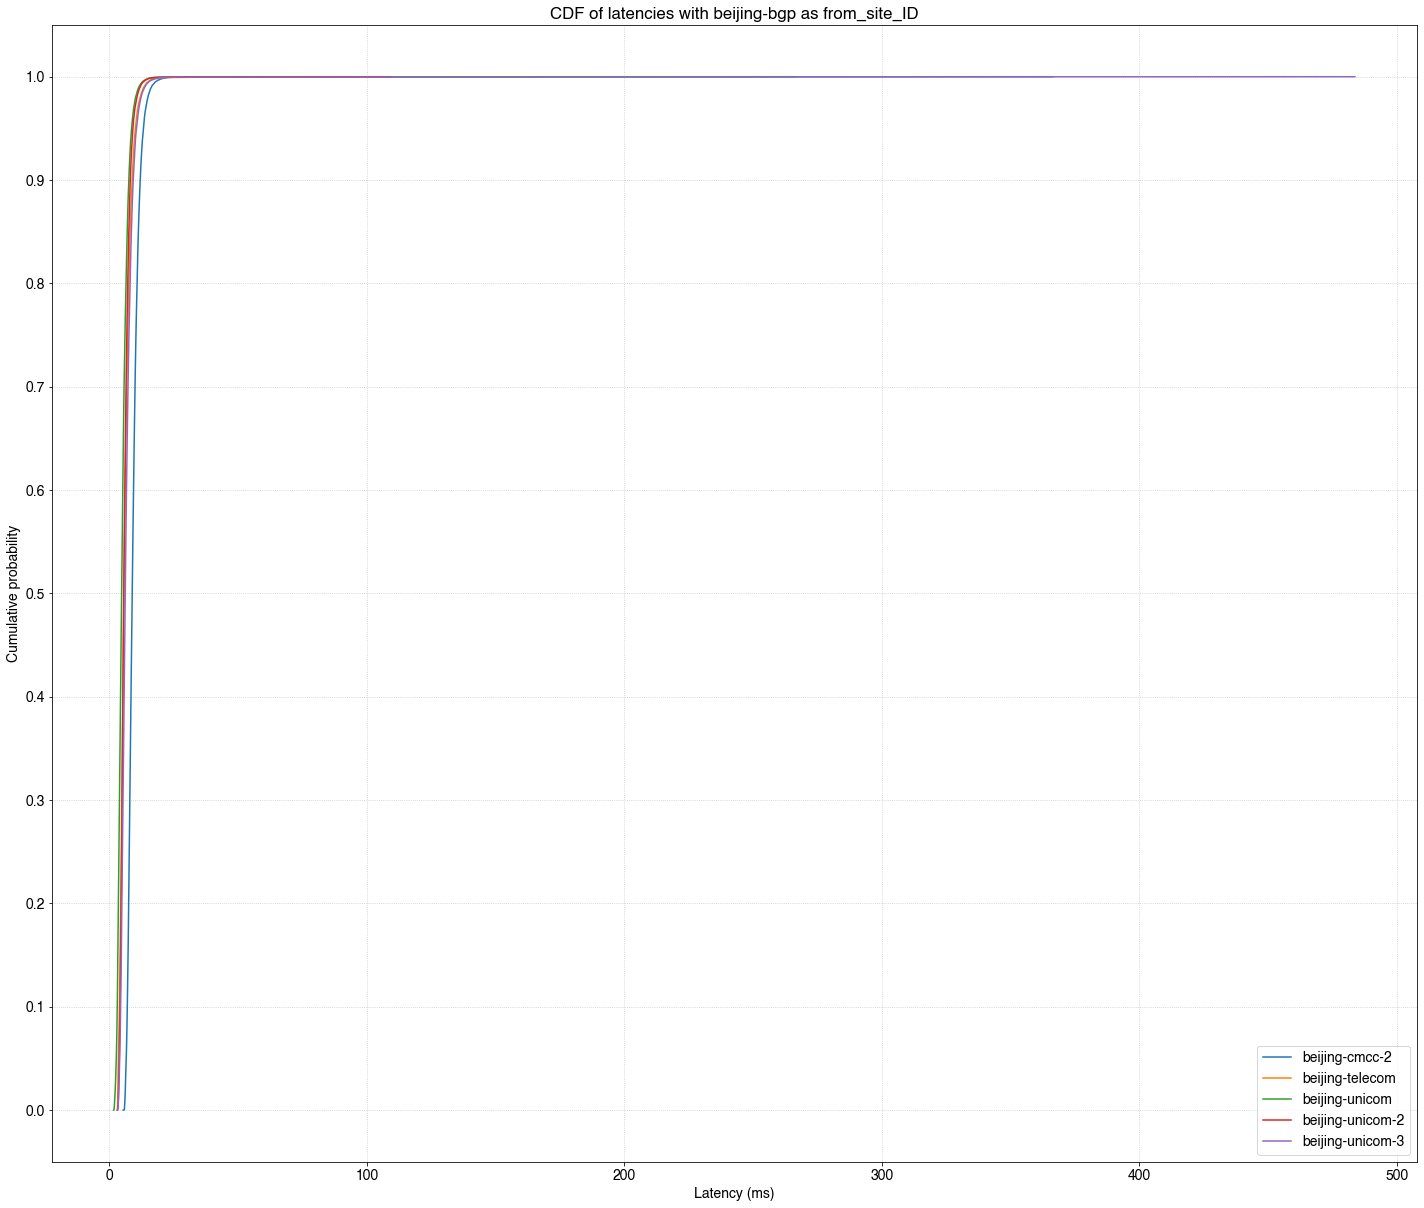

In [9]:
rtt_df = pd.read_csv(DATASET_LOCATION+ "/beijing-bgp.csv")

rtt_beijing = rtt_df.loc[rtt_df["from_site_id"].str.startswith("beijing")]
rtt_beijing = rtt_beijing.loc[rtt_beijing["to_site_id"].str.startswith("beijing")]

rtt_beijing_bgp = rtt_beijing[rtt_beijing["from_site_id"] == "beijing-bgp"]
to_site_ids = sorted(rtt_beijing_bgp["to_site_id"].unique())
latency_vals = {}
for site_id in to_site_ids:
    subset_df = rtt_beijing_bgp[rtt_beijing_bgp["to_site_id"]==site_id]
    latency_vals[site_id] = sorted(subset_df["rtt"].copy().tolist())
    print("RTT statistics to site ID {}".format(site_id))
    print(subset_df["rtt"].describe())
plot_cdf(latency_vals, to_site_ids, "CDF of latencies with beijing-bgp as to_site_ID")

print("\n\n*********************************\nbeijing-bgp as to_site_id")
rtt_beijing_bgp = rtt_beijing[rtt_beijing["to_site_id"] == "beijing-bgp"]
from_site_ids = sorted(rtt_beijing_bgp["from_site_id"].unique())
latency_vals = {}
for site_id in from_site_ids:
    subset_df = rtt_beijing_bgp[rtt_beijing_bgp["from_site_id"]==site_id]
    latency_vals[site_id] = sorted(subset_df["rtt"].copy().tolist())
    print("RTT statistics to site ID {}".format(site_id))
    print(subset_df["rtt"].describe())
plot_cdf(latency_vals, from_site_ids, "CDF of latencies with beijing-bgp as from_site_ID")

RTT statistics to site ID shanghai-cmcc
Min time = 2020-05-31 15:58:25, max time = 2020-06-30 15:58:20
count    43193.000000
mean        18.206842
std         16.227787
min          0.000000
25%          6.256100
50%         10.675100
75%         26.364700
max         89.900100
Name: rtt, dtype: float64
RTT statistics to site ID shanghai-cmcc-2
Min time = 2020-05-31 15:58:25, max time = 2020-06-30 15:58:20
count    42727.000000
mean        19.652200
std         16.403798
min          4.425100
25%          7.229700
50%         12.359100
75%         28.671300
max         92.143400
Name: rtt, dtype: float64
RTT statistics to site ID shanghai-telecom
Min time = 2020-05-31 15:58:25, max time = 2020-06-30 15:58:20
count    43192.000000
mean        18.598280
std         16.202157
min          0.000000
25%          6.785700
50%         10.886200
75%         26.751400
max        162.050800
Name: rtt, dtype: float64
RTT statistics to site ID shanghai-telecom-2
Min time = 2020-05-31 15:58:25, max

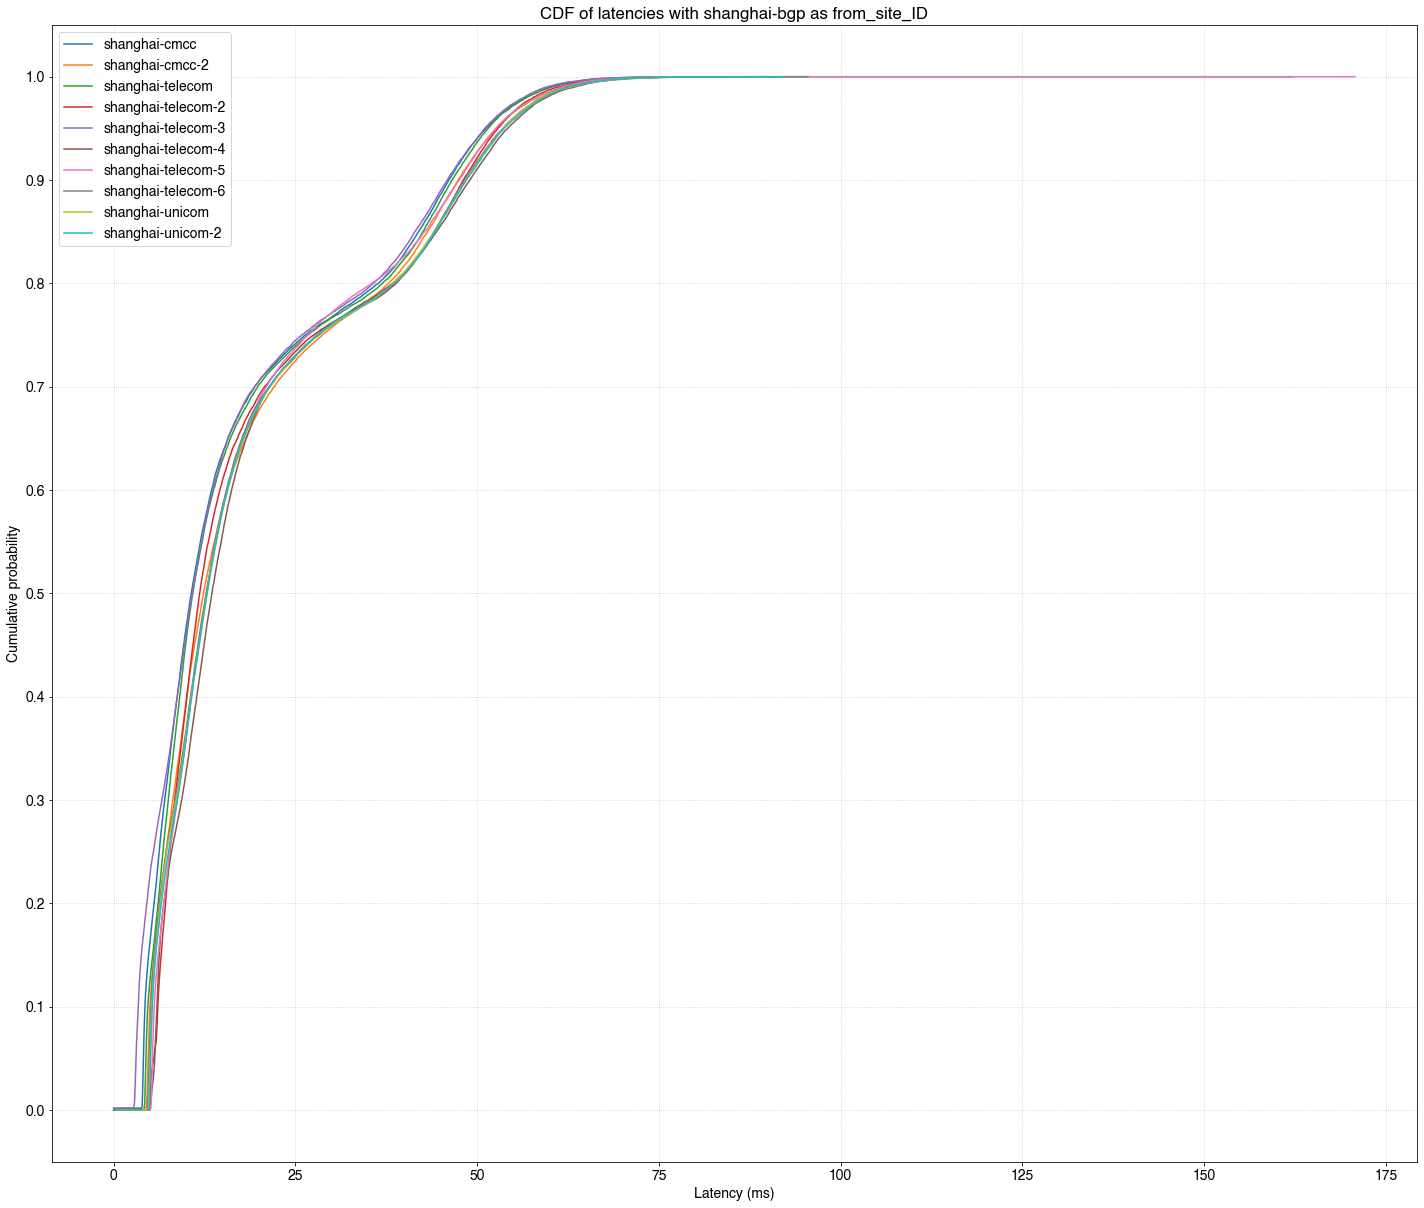



*********************************
shanghai-bgp as to_site_id
RTT statistics to site ID shanghai-cmcc
Min time = 2020-05-31 15:58:19, max time = 2020-06-30 15:58:19
count    43120.000000
mean        10.554887
std          4.117669
min          4.748100
25%          7.531950
50%          9.692100
75%         12.527525
max         54.132800
Name: rtt, dtype: float64
RTT statistics to site ID shanghai-cmcc-2
Min time = 2020-05-31 15:58:19, max time = 2020-06-30 15:58:19
count    28389.000000
mean        12.605176
std          5.290898
min          4.871900
25%          8.742600
50%         11.437100
75%         15.166600
max         62.684200
Name: rtt, dtype: float64
RTT statistics to site ID shanghai-telecom
Min time = 2020-05-31 15:58:19, max time = 2020-06-30 15:58:19
count    43197.000000
mean        10.129575
std          4.197463
min          0.000000
25%          7.141200
50%          9.355200
75%         12.288200
max         59.026100
Name: rtt, dtype: float64
RTT statistics to

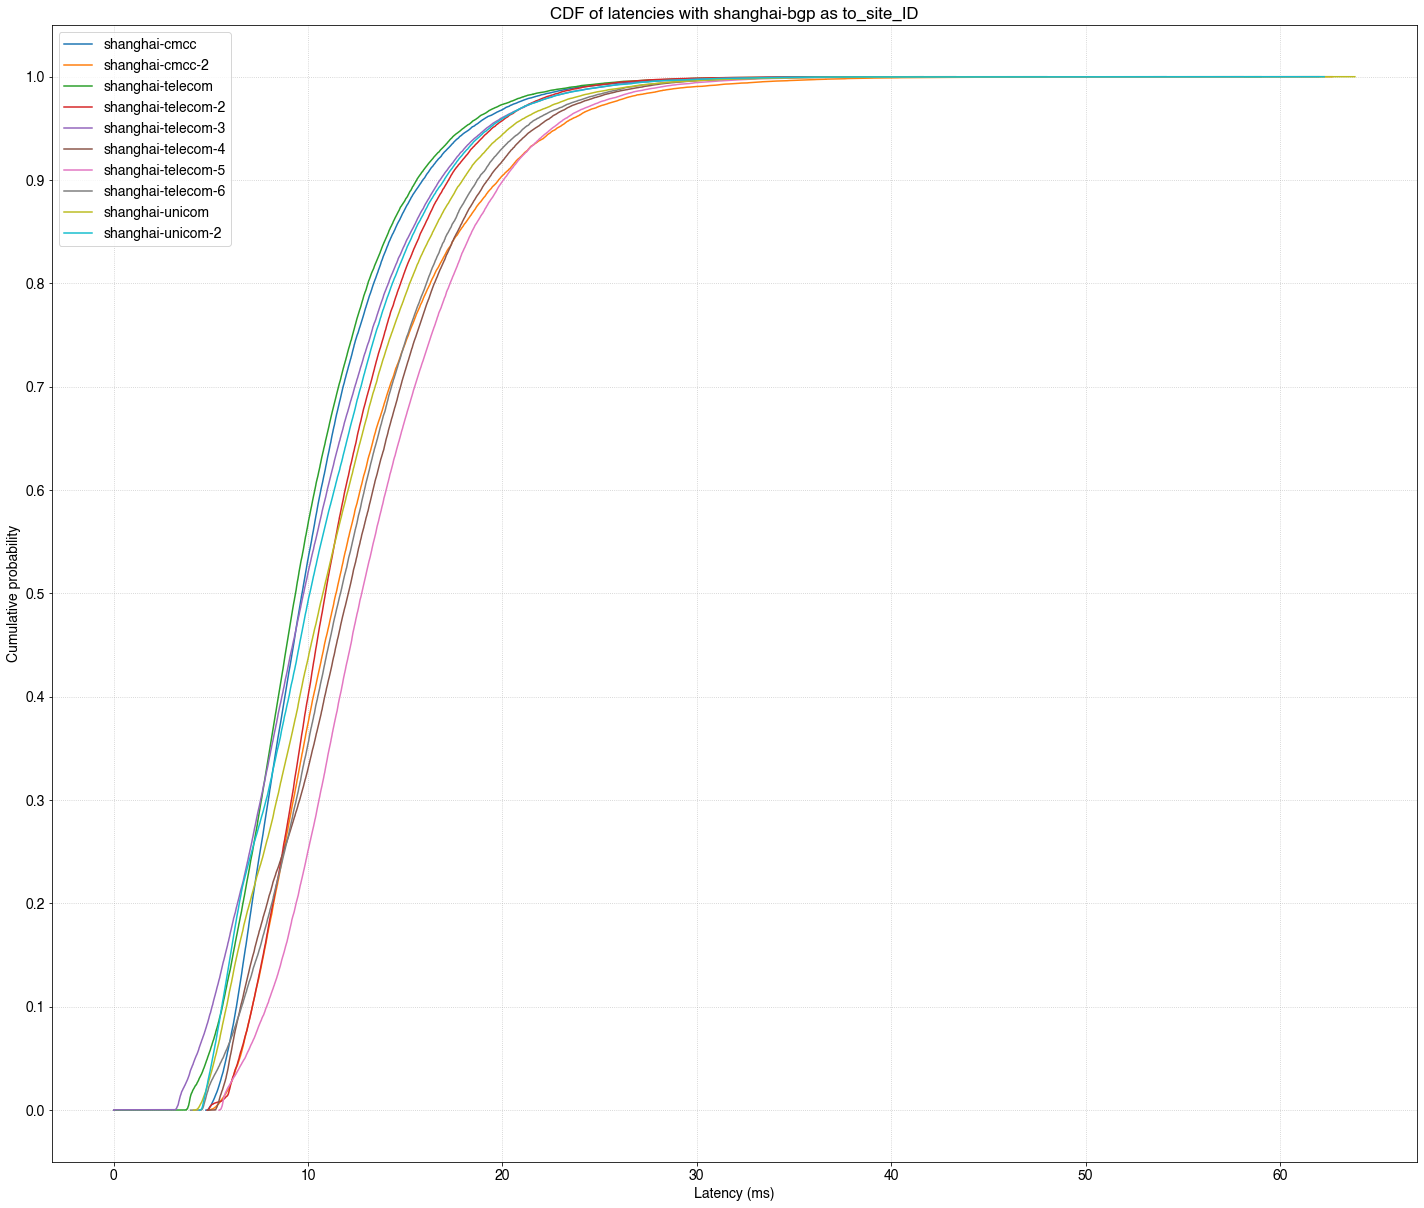

In [10]:
rtt_df = pd.read_csv(DATASET_LOCATION+ "/shanghai-bgp.csv")

rtt_shanghai = rtt_df.loc[rtt_df["from_site_id"].str.startswith("shanghai")]
rtt_shanghai = rtt_shanghai.loc[rtt_shanghai["to_site_id"].str.startswith("shanghai")]

rtt_shanghai_bgp = rtt_shanghai[rtt_shanghai["from_site_id"] == "shanghai-bgp"]
to_site_ids = sorted(rtt_shanghai_bgp["to_site_id"].unique())
latency_vals = {}
for site_id in to_site_ids:
    subset_df = rtt_shanghai_bgp[rtt_shanghai_bgp["to_site_id"]==site_id]
    latency_vals[site_id] = sorted(subset_df["rtt"].copy().tolist())
    print("RTT statistics to site ID {}".format(site_id))
    print("Min time = {}, max time = {}".format(pd.to_datetime(min(rtt_shanghai_bgp["biz_ts"]), unit='s'),pd.to_datetime(max(rtt_shanghai_bgp["biz_ts"]), unit='s')))
    print(subset_df["rtt"].describe())
plot_cdf(latency_vals, to_site_ids, "CDF of latencies with shanghai-bgp as from_site_ID")

print("\n\n*********************************\nshanghai-bgp as to_site_id")
rtt_shanghai_bgp = rtt_shanghai[rtt_shanghai["to_site_id"] == "shanghai-bgp"]
from_site_ids = sorted(rtt_shanghai_bgp["from_site_id"].unique())
latency_vals = {}
for site_id in from_site_ids:
    subset_df = rtt_shanghai_bgp[rtt_shanghai_bgp["from_site_id"]==site_id]
    latency_vals[site_id] = sorted(subset_df["rtt"].copy().tolist())
    print("RTT statistics to site ID {}".format(site_id))
    print("Min time = {}, max time = {}".format(pd.to_datetime(min(rtt_shanghai_bgp["biz_ts"]), unit='s'),pd.to_datetime(max(rtt_shanghai_bgp["biz_ts"]), unit='s')))
    print(subset_df["rtt"].describe())
plot_cdf(latency_vals, from_site_ids, "CDF of latencies with shanghai-bgp as to_site_ID")

RTT statistics to site ID shanghai-cmcc
Min time = 2020-05-31 15:58:25, max time = 2020-06-30 15:58:20
count    85920.000000
mean        18.925601
std         16.331455
min          0.000000
25%          6.698325
50%         11.515200
75%         27.615000
max         92.143400
Name: rtt, dtype: float64
RTT statistics to site ID shanghai-telecom
Min time = 2020-05-31 15:58:25, max time = 2020-06-30 15:58:20
count    244351.000000
mean         19.329200
std          16.358739
min           0.000000
25%           7.191100
50%          12.107000
75%          27.206700
max         170.726400
Name: rtt, dtype: float64
RTT statistics to site ID shanghai-unicom
Min time = 2020-05-31 15:58:25, max time = 2020-06-30 15:58:20
count    85553.000000
mean        20.004551
std         16.580115
min          4.061200
25%          7.420400
50%         12.847500
75%         27.972900
max         92.189800
Name: rtt, dtype: float64


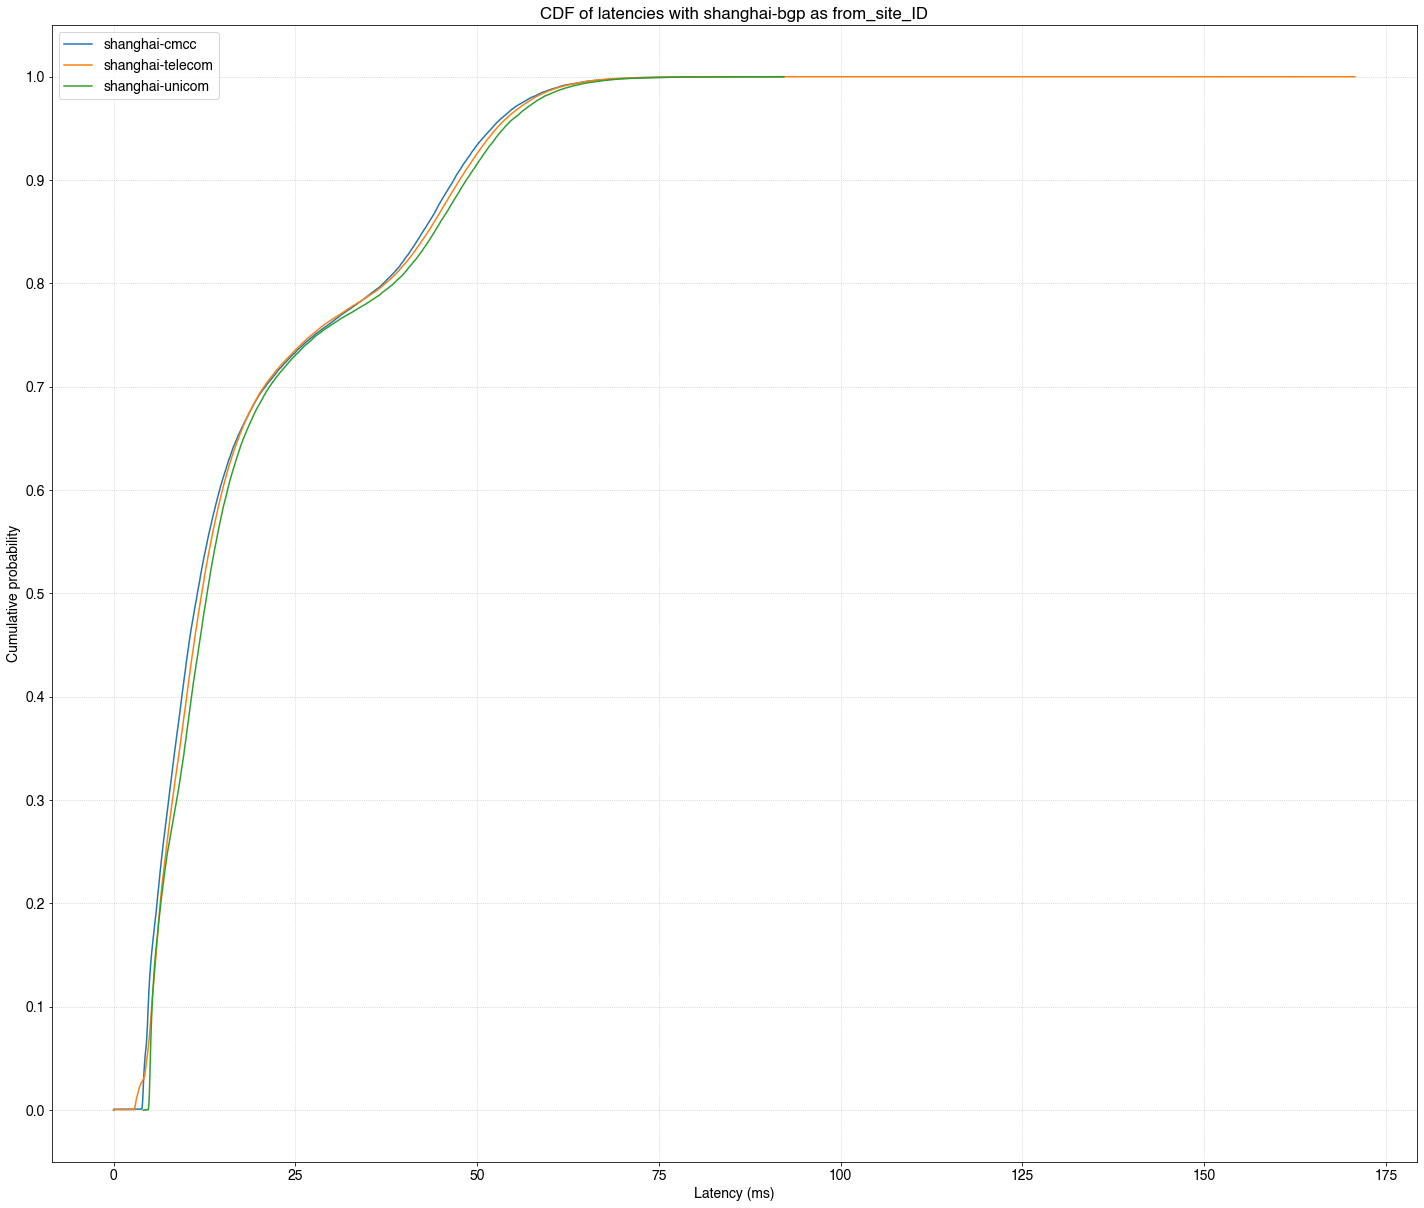



*********************************
shanghai-bgp as to_site_id
RTT statistics to site ID shanghai-cmcc
Min time = 2020-05-31 15:58:19, max time = 2020-06-30 15:58:19
count    71509.000000
mean        11.368850
std          4.726885
min          4.748100
25%          7.957000
50%         10.302400
75%         13.540800
max         62.684200
Name: rtt, dtype: float64
RTT statistics to site ID shanghai-telecom
Min time = 2020-05-31 15:58:19, max time = 2020-06-30 15:58:19
count    241914.000000
mean         11.764919
std           4.786474
min           0.000000
25%           8.222600
50%          11.027450
75%          14.464975
max          61.999600
Name: rtt, dtype: float64
RTT statistics to site ID shanghai-unicom
Min time = 2020-05-31 15:58:19, max time = 2020-06-30 15:58:19
count    86363.000000
mean        11.162078
std          4.786215
min          4.107900
25%          7.417350
50%         10.421400
75%         13.849750
max         63.854800
Name: rtt, dtype: float64


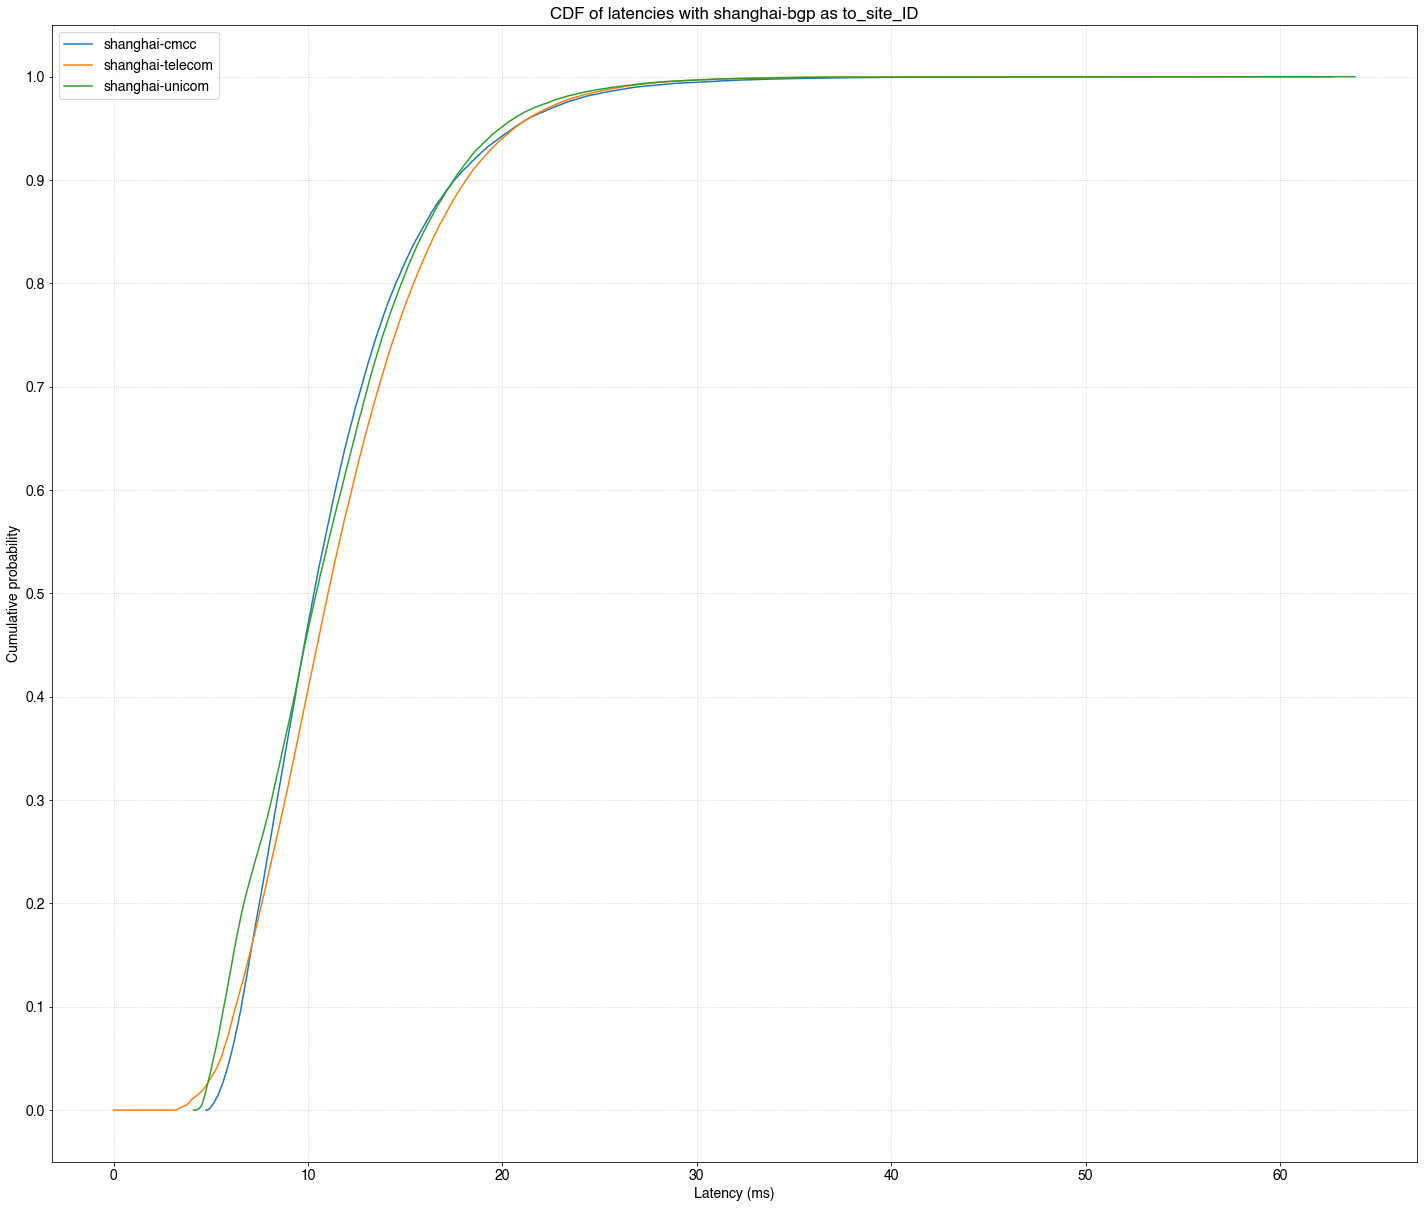

In [11]:
rtt_df = pd.read_csv(DATASET_LOCATION+ "/shanghai-bgp.csv")

rtt_shanghai = rtt_df.loc[rtt_df["from_site_id"].str.startswith("shanghai")]
rtt_shanghai = rtt_shanghai.loc[rtt_shanghai["to_site_id"].str.startswith("shanghai")]

rtt_shanghai_bgp = rtt_shanghai[rtt_shanghai["from_site_id"] == "shanghai-bgp"]
to_site_ids = ["shanghai-cmcc", "shanghai-telecom", "shanghai-unicom"]
latency_vals = {}
for site_id in to_site_ids:
    subset_df = rtt_shanghai_bgp.loc[rtt_shanghai_bgp["to_site_id"].str.startswith(site_id)]
    latency_vals[site_id] = sorted(subset_df["rtt"].copy().tolist())
    print("RTT statistics to site ID {}".format(site_id))
    print("Min time = {}, max time = {}".format(pd.to_datetime(min(rtt_shanghai_bgp["biz_ts"]), unit='s'),pd.to_datetime(max(rtt_shanghai_bgp["biz_ts"]), unit='s')))
    print(subset_df["rtt"].describe())
plot_cdf(latency_vals, to_site_ids, "CDF of latencies with shanghai-bgp as from_site_ID")

print("\n\n*********************************\nshanghai-bgp as to_site_id")
rtt_shanghai_bgp = rtt_shanghai[rtt_shanghai["to_site_id"] == "shanghai-bgp"]
from_site_ids = ["shanghai-cmcc", "shanghai-telecom", "shanghai-unicom"]
latency_vals = {}
for site_id in from_site_ids:
    subset_df = rtt_shanghai_bgp.loc[rtt_shanghai_bgp["from_site_id"].str.startswith(site_id)]
    latency_vals[site_id] = sorted(subset_df["rtt"].copy().tolist())
    print("RTT statistics to site ID {}".format(site_id))
    print("Min time = {}, max time = {}".format(pd.to_datetime(min(rtt_shanghai_bgp["biz_ts"]), unit='s'),pd.to_datetime(max(rtt_shanghai_bgp["biz_ts"]), unit='s')))
    print(subset_df["rtt"].describe())
plot_cdf(latency_vals, from_site_ids, "CDF of latencies with shanghai-bgp as to_site_ID")



*********************************
shanghai-bgp as to_site_id
RTT statistics to site ID changzhou
Min time = 2020-05-31 15:58:19, max time = 2020-06-30 15:59:00
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: rtt, dtype: float64
RTT statistics to site ID wuxi
Min time = 2020-05-31 15:58:19, max time = 2020-06-30 15:59:00
count    170027.000000
mean         17.468704
std           5.528156
min           7.034200
25%          13.106400
50%          17.605900
75%          21.046200
max          69.653300
Name: rtt, dtype: float64
RTT statistics to site ID nanjing
Min time = 2020-05-31 15:58:19, max time = 2020-06-30 15:59:00
count    84549.00000
mean        23.72510
std          6.96511
min          0.00000
25%         17.98840
50%         23.65840
75%         28.28910
max         90.05200
Name: rtt, dtype: float64
RTT statistics to site ID hefei
Min time = 2020-05-31 15:58:19, max time = 2020-06-30 15:59:00
count    42450.000

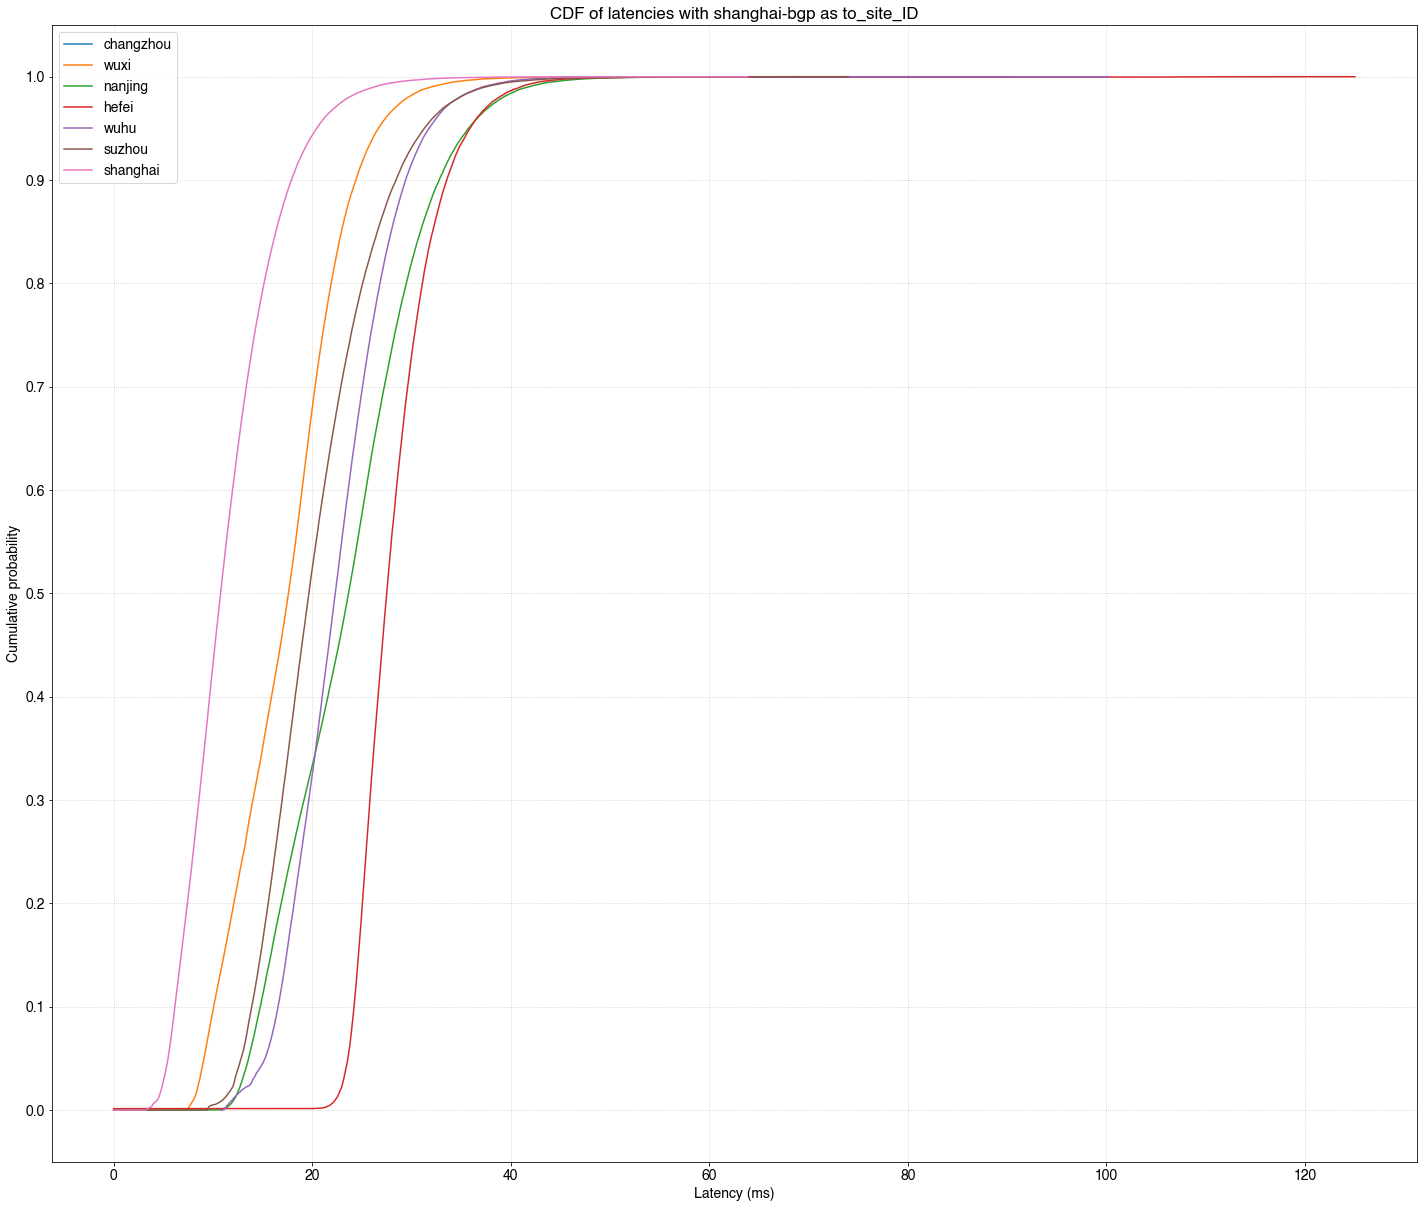

In [20]:
rtt_df = pd.read_csv(DATASET_LOCATION+ "/shanghai-bgp.csv")

print("\n\n*********************************\nshanghai-bgp as to_site_id")
rtt_shanghai_bgp = rtt_df[rtt_df["to_site_id"] == "shanghai-bgp"]


from_site_ids = ["changzhou", "wuxi", "nanjing", "hefei", "wuhu", "suzhou", "shanghai"]
#from_site_ids = ["shanghai", "guangzhou", "wuxi", "wuhu", "hefei", "nanjing", "hangzhou", "ningbo", "wenzhou", "qingdao"]
latency_vals = {}
for site_id in from_site_ids:
    subset_df = rtt_shanghai_bgp.loc[rtt_shanghai_bgp["from_site_id"].str.startswith(site_id)]
    latency_vals[site_id] = sorted(subset_df["rtt"].copy().tolist())
    print("RTT statistics to site ID {}".format(site_id))
    print("Min time = {}, max time = {}".format(pd.to_datetime(min(rtt_shanghai_bgp["biz_ts"]), unit='s'),pd.to_datetime(max(rtt_shanghai_bgp["biz_ts"]), unit='s')))
    print(subset_df["rtt"].describe())
plot_cdf(latency_vals, from_site_ids, "CDF of latencies with shanghai-bgp as to_site_ID")



*********************************
shenzhen-bgp as to_site_id
RTT statistics to site ID shenzhen
Min time = 2020-05-31 15:58:19, max time = 2020-06-30 15:59:00
count    118702.000000
mean          7.463194
std           2.507906
min           0.000000
25%           5.738100
50%           6.868750
75%           8.521375
max          75.141100
Name: rtt, dtype: float64
RTT statistics to site ID guangzhou
Min time = 2020-05-31 15:58:19, max time = 2020-06-30 15:59:00
count    114502.000000
mean          9.800557
std           1.938234
min           0.000000
25%           8.348725
50%           9.727200
75%          10.924375
max          67.154800
Name: rtt, dtype: float64
RTT statistics to site ID foshan
Min time = 2020-05-31 15:58:19, max time = 2020-06-30 15:59:00
count    86344.000000
mean        11.065155
std          2.159448
min          7.570700
25%          9.617575
50%         10.642850
75%         11.992750
max         60.821800
Name: rtt, dtype: float64
RTT statistics to site

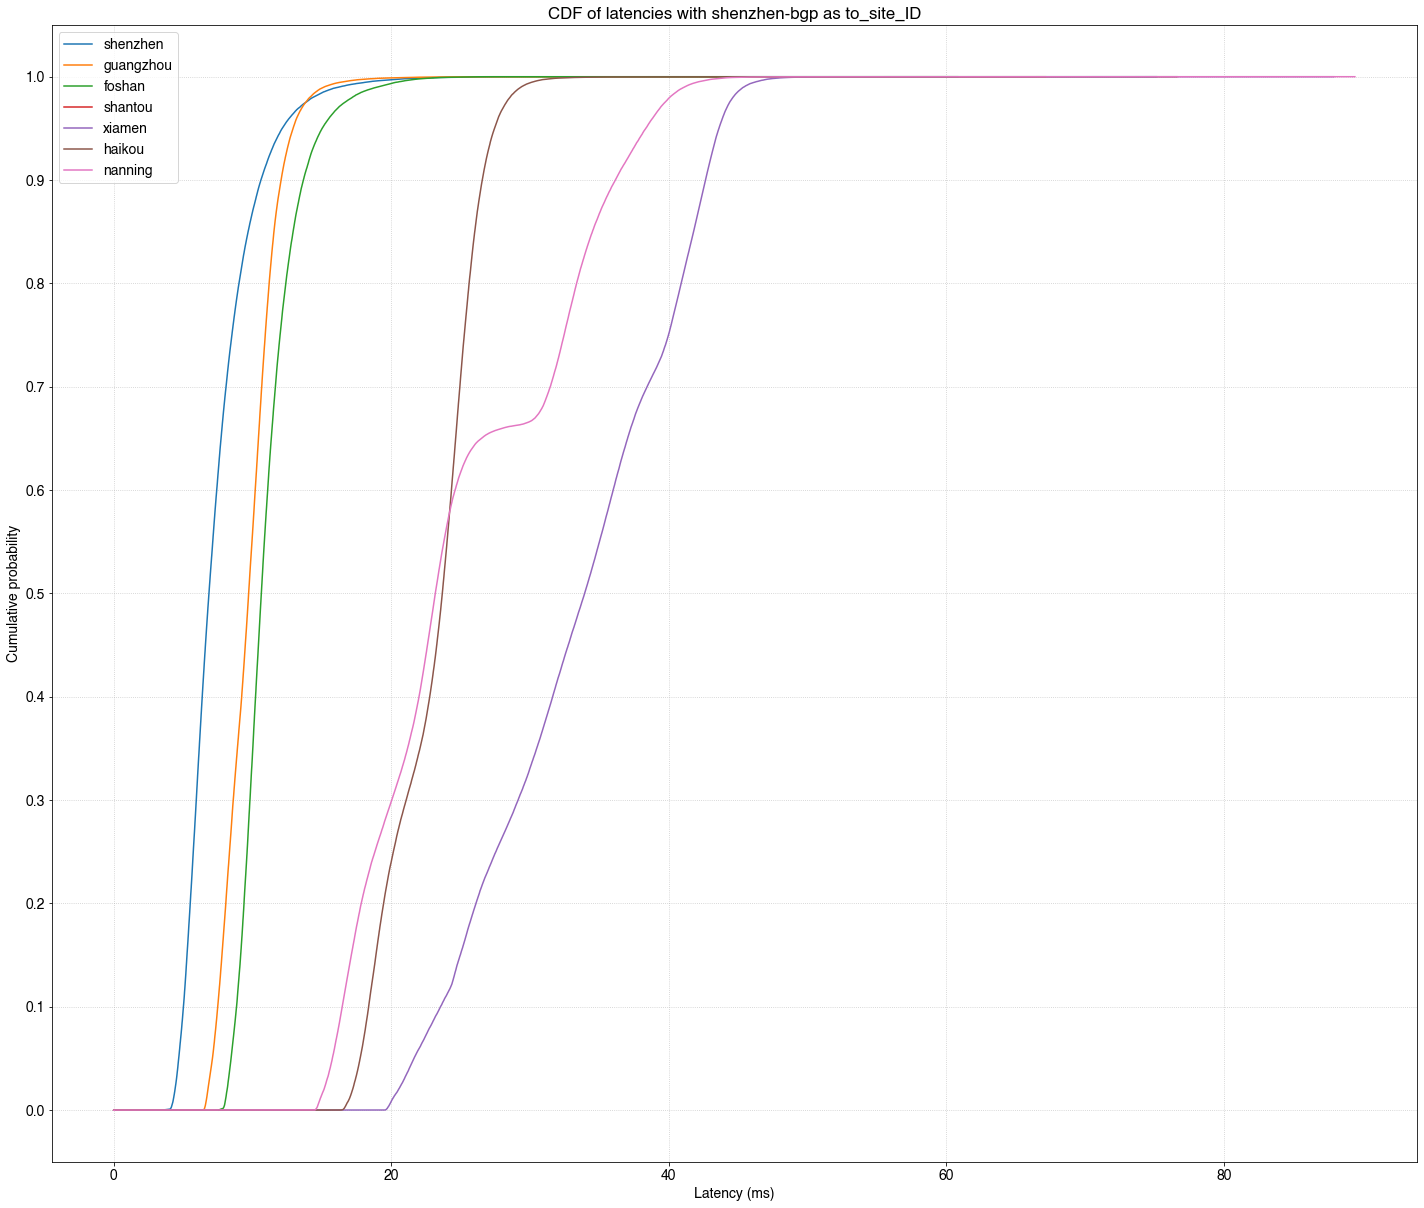

In [13]:

rtt_df = pd.read_csv(DATASET_LOCATION+ "/shenzhen-bgp.csv")

print("\n\n*********************************\nshenzhen-bgp as to_site_id")
rtt_shenzhen = rtt_df[rtt_df["to_site_id"] == "shenzhen-bgp"]

from_site_ids = ["shenzhen", "guangzhou", "foshan", "shantou", "xiamen", "haikou", "nanning"]
latency_vals = {}
for site_id in from_site_ids:
    subset_df = rtt_shenzhen.loc[rtt_shenzhen["from_site_id"].str.startswith(site_id)]
    latency_vals[site_id] = sorted(subset_df["rtt"].copy().tolist())
    print("RTT statistics to site ID {}".format(site_id))
    print("Min time = {}, max time = {}".format(pd.to_datetime(min(rtt_shenzhen["biz_ts"]), unit='s'),pd.to_datetime(max(rtt_shenzhen["biz_ts"]), unit='s')))
    print(subset_df["rtt"].describe())
plot_cdf(latency_vals, from_site_ids, "CDF of latencies with shenzhen-bgp as to_site_ID")

RTT statistics to site ID shanghai-bgp
Min time = 2020-05-31 15:59:00, max time = 2020-06-30 15:58:00
count    43120.000000
mean        10.554887
std          4.117669
min          4.748100
25%          7.531950
50%          9.692100
75%         12.527525
max         54.132800
Name: rtt, dtype: float64
RTT statistics to site ID shanghai-cmcc-2
Min time = 2020-05-31 15:59:00, max time = 2020-06-30 15:58:00
count    43120.000000
mean         2.723362
std          0.690135
min          2.043500
25%          2.250100
50%          2.436200
75%          2.940500
max          7.727100
Name: rtt, dtype: float64


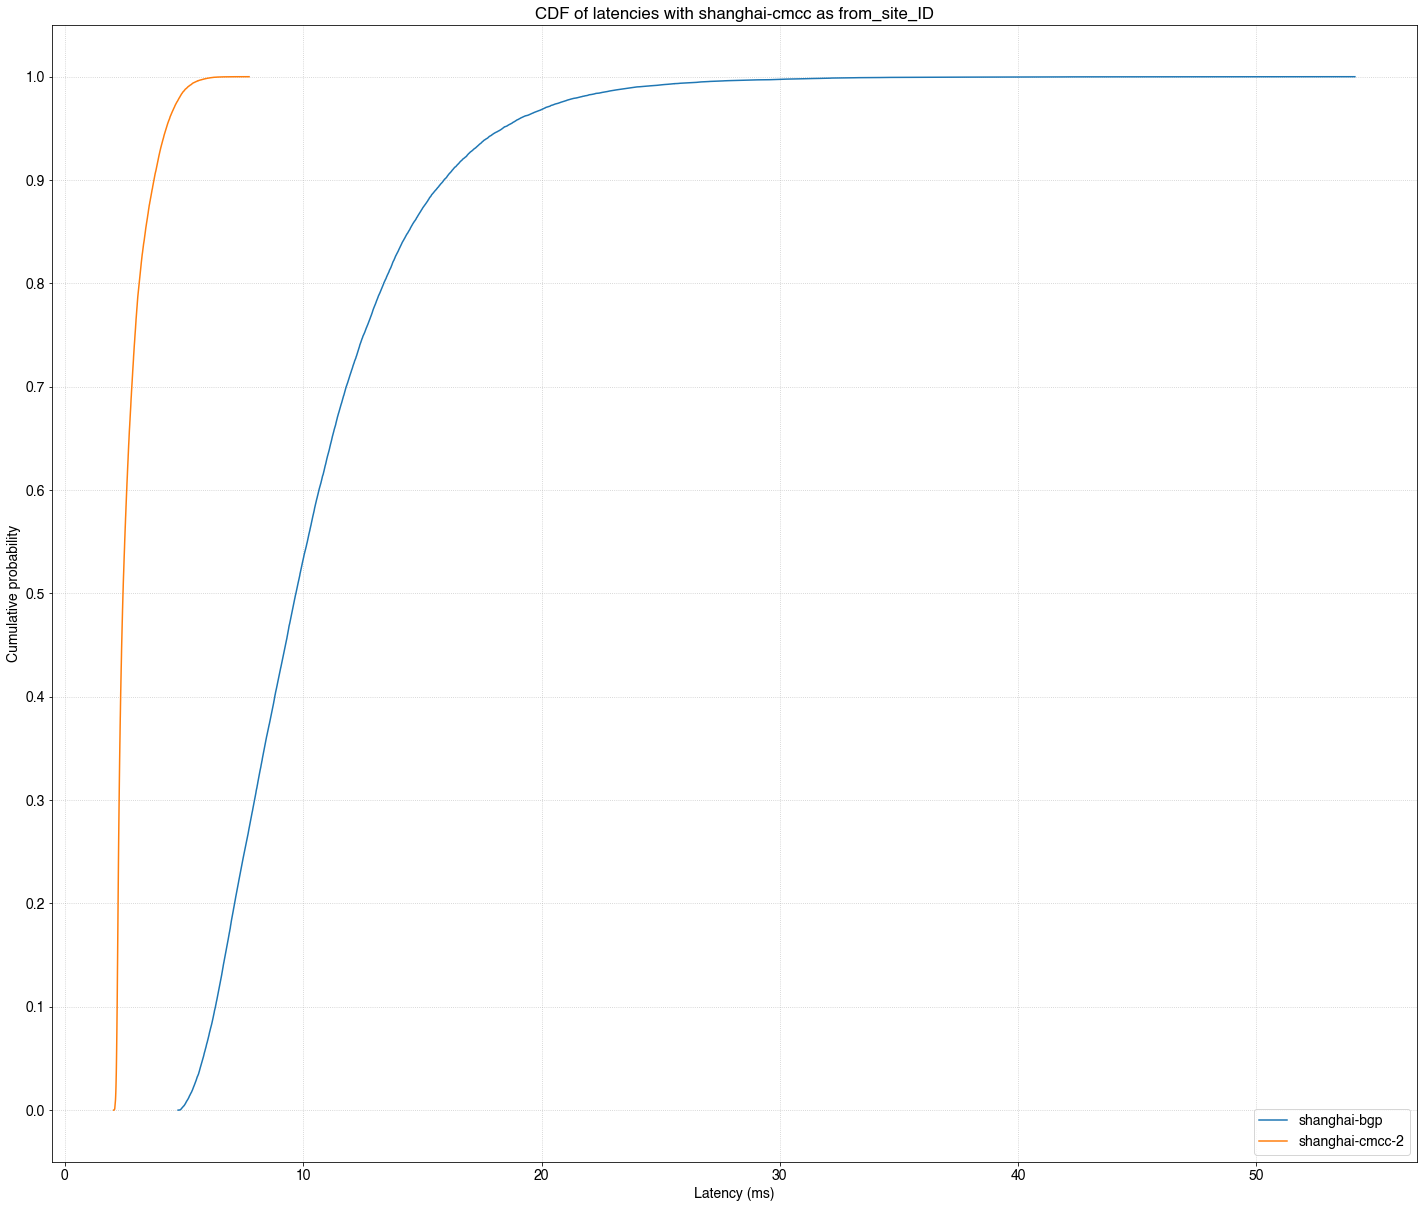



*********************************
shanghai-bgp as to_site_id
RTT statistics to site ID shanghai-bgp
Min time = 2020-05-31 15:59:00, max time = 2020-06-30 15:58:00
count    43193.000000
mean        18.206842
std         16.227787
min          0.000000
25%          6.256100
50%         10.675100
75%         26.364700
max         89.900100
Name: rtt, dtype: float64
RTT statistics to site ID shanghai-cmcc-2
Min time = 2020-05-31 15:59:00, max time = 2020-06-30 15:58:00
count    43195.000000
mean         2.917226
std          0.801552
min          0.000000
25%          2.268400
50%          2.667300
75%          3.364600
max          7.010700
Name: rtt, dtype: float64


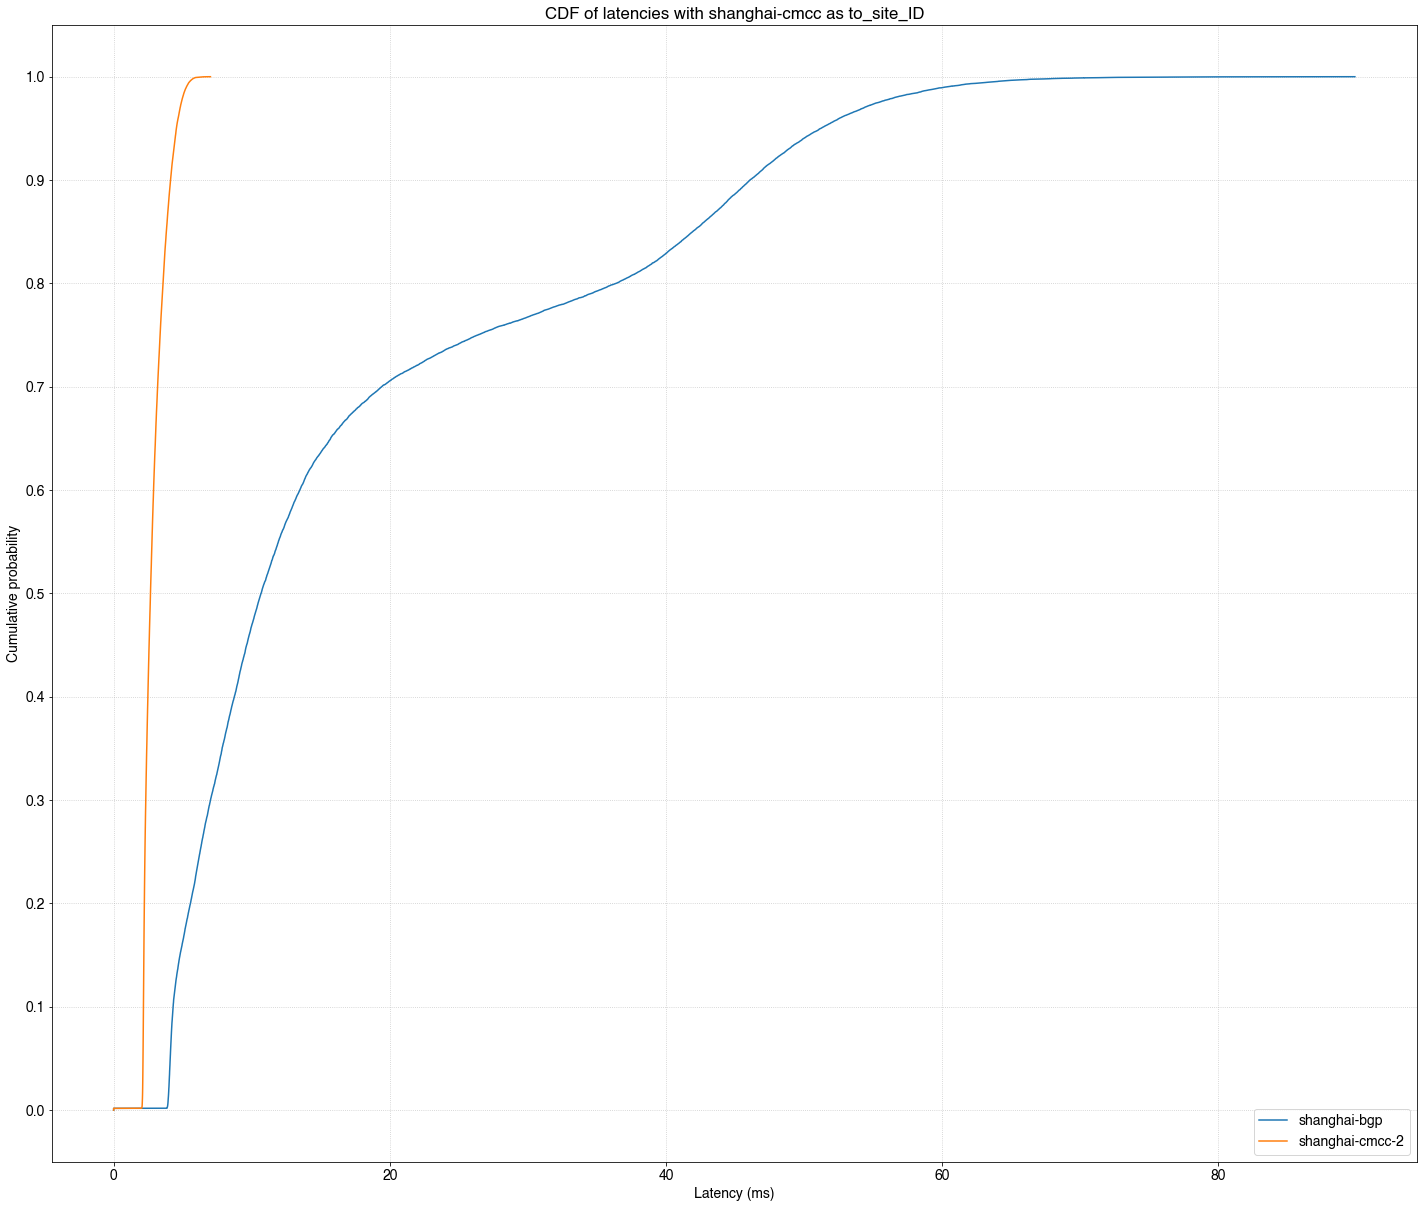

In [14]:
rtt_shanghai_cmcc_df = pd.read_csv(DATASET_LOCATION+ "/shanghai-cmcc.csv")

rtt_shanghai = rtt_shanghai_cmcc_df.loc[rtt_shanghai_cmcc_df["from_site_id"].str.startswith("shanghai")]
rtt_shanghai = rtt_shanghai.loc[rtt_shanghai["to_site_id"].str.startswith("shanghai")]

rtt_shanghai_subset = rtt_shanghai[rtt_shanghai["from_site_id"] == "shanghai-cmcc"]
to_site_ids = sorted(rtt_shanghai_subset["to_site_id"].unique())

latency_vals = {}
for site_id in to_site_ids:
    subset_df = rtt_shanghai_subset[rtt_shanghai_subset["to_site_id"]==site_id]
    latency_vals[site_id] = sorted(subset_df["rtt"].copy().tolist())
    print("RTT statistics to site ID {}".format(site_id))
    print("Min time = {}, max time = {}".format(pd.to_datetime(min(rtt_shanghai_subset["biz_ts"]), unit='s'),pd.to_datetime(max(rtt_shanghai_subset["biz_ts"]), unit='s')))
    print(subset_df["rtt"].describe())
plot_cdf(latency_vals, to_site_ids, "CDF of latencies with shanghai-cmcc as from_site_ID")

print("\n\n*********************************\nshanghai-bgp as to_site_id")
rtt_shanghai_subset = rtt_shanghai[rtt_shanghai["to_site_id"] == "shanghai-cmcc"]
from_site_ids = sorted(rtt_shanghai_subset["from_site_id"].unique())
latency_vals = {}
for site_id in from_site_ids:
    subset_df = rtt_shanghai_subset[rtt_shanghai_subset["from_site_id"]==site_id]
    latency_vals[site_id] = sorted(subset_df["rtt"].copy().tolist())
    print("RTT statistics to site ID {}".format(site_id))
    print("Min time = {}, max time = {}".format(pd.to_datetime(min(rtt_shanghai_subset["biz_ts"]), unit='s'),pd.to_datetime(max(rtt_shanghai_subset["biz_ts"]), unit='s')))
    print(subset_df["rtt"].describe())
plot_cdf(latency_vals, from_site_ids, "CDF of latencies with shanghai-cmcc as to_site_ID")

In [6]:
# Plots RTT with 10-minute average
rtt_df = pd.read_csv(DATASET_LOCATION+ "/shanghai-bgp.csv")

rtt_shanghai = rtt_df.loc[rtt_df["from_site_id"].str.startswith("shanghai")]
rtt_shanghai = rtt_shanghai.loc[rtt_shanghai["to_site_id"].str.startswith("shanghai")]

rtt_shanghai_bgp = rtt_shanghai[rtt_shanghai["from_site_id"] == "shanghai-bgp"]
to_site_ids = sorted(rtt_shanghai_bgp["to_site_id"].unique())

rtt_shanghai_bgp = rtt_shanghai_bgp.sort_values(by='biz_ts')
print(rtt_shanghai_bgp.head)
print(rtt_shanghai_bgp.groupby("biz_ts").groups)

<bound method NDFrame.head of           Unnamed: 0  from_site_id          to_site_id      rtt  type  \
183721       5065165  shanghai-bgp  shanghai-telecom-3   5.0559  icmp   
91772        2239153  shanghai-bgp  shanghai-telecom-6   4.9567  icmp   
160482       4357893  shanghai-bgp     shanghai-unicom  36.1260  icmp   
242809       6945289  shanghai-bgp       shanghai-cmcc  40.1081  icmp   
126651       3413346  shanghai-bgp     shanghai-cmcc-2  39.0771  icmp   
...              ...           ...                 ...      ...   ...   
9220520    255866573  shanghai-bgp   shanghai-unicom-2  44.2399  icmp   
11502574   323781277  shanghai-bgp    shanghai-telecom  48.8072  icmp   
10892764   304298729  shanghai-bgp     shanghai-unicom  44.4929  icmp   
11407092   320574233  shanghai-bgp  shanghai-telecom-6   6.1737  icmp   
10304205   286228577  shanghai-bgp  shanghai-telecom-4   6.0734  icmp   

              biz_ts  
183721    1590940705  
91772     1590940718  
160482    1590940740  
2

In [10]:
# Plots RTT with 10-minute average
rtt_df = pd.read_csv(DATASET_LOCATION+ "/shanghai-bgp.csv")

rtt_df['biz_ts'] = pd.to_datetime(rtt_df['biz_ts'],unit='s')


rtt_shanghai = rtt_df.loc[rtt_df["from_site_id"].str.startswith("shanghai")]
rtt_shanghai = rtt_shanghai.loc[rtt_shanghai["to_site_id"].str.startswith("shanghai")]

rtt_shanghai_bgp = rtt_shanghai[rtt_shanghai["from_site_id"] == "shanghai-bgp"]
to_site_ids = sorted(rtt_shanghai_bgp["to_site_id"].unique())

rtt_shanghai_bgp = rtt_shanghai_bgp.sort_values(by='biz_ts')

#
r = rtt_shanghai_bgp.resample("5T")
print(r.head())
# print(r.groupby("to_site_id").groups)

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [22]:
# Calculate covariance between each pair of shanghai-BGP to other cities
rtt_df = pd.read_csv(DATASET_LOCATION+ "/shanghai-bgp.csv")

rtt_shanghai = rtt_df.loc[rtt_df["from_site_id"].str.startswith("shanghai")]
rtt_shanghai = rtt_shanghai.loc[rtt_shanghai["to_site_id"].str.startswith("shanghai")]

rtt_shanghai_bgp = rtt_shanghai[rtt_shanghai["from_site_id"] == "shanghai-bgp"]
rtt_shanghai_bgp = rtt_shanghai_bgp.sort_values(by='biz_ts')
rtt_shanghai_bgp['biz_ts'] = pd.to_datetime(rtt_shanghai_bgp['biz_ts'],unit='s')

to_site_ids = sorted(rtt_shanghai_bgp["to_site_id"].unique())
latency_vals = {}

for site_id in to_site_ids:
    subset_df = rtt_shanghai_bgp[rtt_shanghai_bgp["to_site_id"]==site_id]
    latency_vals[site_id] = subset_df["rtt"].copy().tolist()

new_latency_df = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in latency_vals.items()]))

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(new_latency_df.cov())

                    shanghai-cmcc  shanghai-cmcc-2  shanghai-telecom  \
shanghai-cmcc          263.341067        10.911897          7.881652   
shanghai-cmcc-2         10.911897       269.084605          9.838963   
shanghai-telecom         7.881652         9.838963        262.509906   
shanghai-telecom-2       6.654659         6.648995         16.977157   
shanghai-telecom-3       8.325810         7.480242          6.966832   
shanghai-telecom-4       7.185131         8.157563          9.479662   
shanghai-telecom-5       8.679997         5.773487          3.240917   
shanghai-telecom-6      11.919156        10.607957          6.446080   
shanghai-unicom         12.635655         4.757220          8.477896   
shanghai-unicom-2        6.435958         8.098485         14.387458   

                    shanghai-telecom-2  shanghai-telecom-3  \
shanghai-cmcc                 6.654659            8.325810   
shanghai-cmcc-2               6.648995            7.480242   
shanghai-telecom     

In [33]:
# Calculate covariance between each pair of shanghai-BGP to other cities
# In time periods of 10 minutes each

rtt_df = pd.read_csv(DATASET_LOCATION+ "/shanghai-bgp.csv")
rtt_shanghai = rtt_df.loc[rtt_df["from_site_id"].str.startswith("shanghai")]
rtt_shanghai = rtt_shanghai.loc[rtt_shanghai["to_site_id"].str.startswith("shanghai")]


rtt_shanghai_bgp = rtt_shanghai[rtt_shanghai["from_site_id"] == "shanghai-bgp"]
rtt_shanghai_bgp = rtt_shanghai_bgp.sort_values(by='biz_ts')
rtt_shanghai_bgp['biz_ts'] = pd.to_datetime(rtt_shanghai_bgp['biz_ts'],unit='s')
rtt_shanghai_bgp = rtt_shanghai_bgp.set_index('biz_ts')

to_site_ids = sorted(rtt_shanghai_bgp["to_site_id"].unique())

first_timestamp = min(rtt_shanghai_bgp.index)
# first ten hours
for i in range(10):
    last_timestamp = first_timestamp+pd.Timedelta(hours=1)
    print("\n\nCovariance matrix between timestamps ({},{})".format(first_timestamp, last_timestamp))
    subset_time_df = rtt_shanghai_bgp[(rtt_shanghai_bgp.index > first_timestamp) & (rtt_shanghai_bgp.index < last_timestamp)]

    latency_vals = {}
    for site_id in to_site_ids:
        subset_df = subset_time_df[subset_time_df["to_site_id"]==site_id]
        latency_vals[site_id] = subset_df["rtt"].copy().tolist()
    new_latency_df = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in latency_vals.items()]))

    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print(new_latency_df.cov())
    first_timestamp = last_timestamp



Covariance matrix between timestamps (2020-05-31 15:58:25,2020-05-31 16:58:25)
                    shanghai-cmcc  shanghai-cmcc-2  shanghai-telecom  \
shanghai-cmcc          330.209142        59.200877         64.250752   
shanghai-cmcc-2         59.200877       300.371197        -48.216695   
shanghai-telecom        64.250752       -48.216695        286.872098   
shanghai-telecom-2     -27.511545        69.314895        -43.801968   
shanghai-telecom-3      22.492517        47.488250        -61.398607   
shanghai-telecom-4      34.383946        84.558930        -76.699558   
shanghai-telecom-5     -22.311566        19.424035        -10.229967   
shanghai-telecom-6     -27.493106        52.509810       -110.750743   
shanghai-unicom         29.120613       -40.233806         21.253973   
shanghai-unicom-2      -12.184254       -62.209372        -20.636233   

                    shanghai-telecom-2  shanghai-telecom-3  \
shanghai-cmcc               -27.511545           22.492517   
sh

First timestamp = 2020-05-31 15:58:19, last timestamp = 2020-06-30 15:58:19
['shanghai-bgp', 'shanghai-telecom', 'shanghai-telecom-2', 'shanghai-telecom-3', 'shanghai-telecom-4', 'shanghai-telecom-5', 'shanghai-telecom-6']


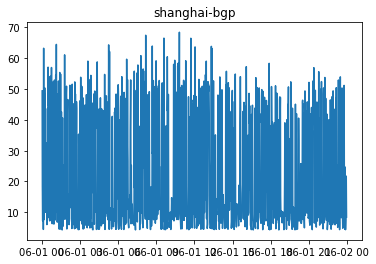

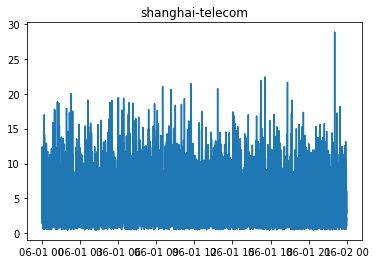

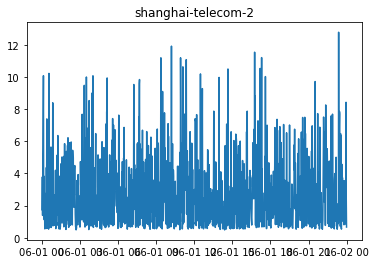

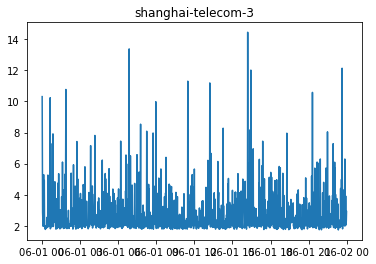

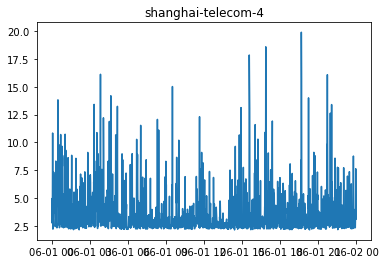

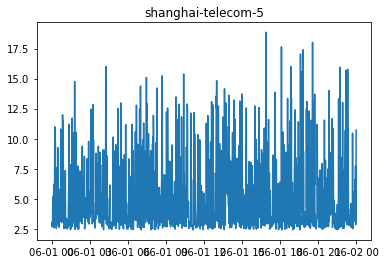

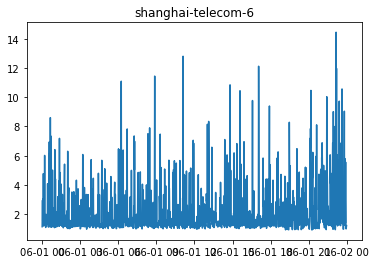

In [12]:
# "shanghai-cmcc" as "from-site-id"
rtt_df = pd.read_csv(DATASET_LOCATION+ "/shanghai-telecom.csv")

rtt_shanghai_subset = rtt_df.loc[rtt_df["to_site_id"].str.startswith("shanghai")]
rtt_shanghai_subset = rtt_shanghai_subset.sort_values(by='biz_ts')
rtt_shanghai_subset['biz_ts'] = pd.to_datetime(rtt_shanghai_subset['biz_ts'],unit='s')
rtt_shanghai_subset = rtt_shanghai_subset.set_index('biz_ts')
print("First timestamp = {}, last timestamp = {}".format(min(rtt_shanghai_subset.index), max(rtt_shanghai_subset.index)))

# 1st of June
to_site_ids = sorted(rtt_shanghai_subset["to_site_id"].unique())
print(to_site_ids)
first_timestamp = pd.Timestamp(year=2020, month=6, day=1, hour=0, minute=0, second=0)
last_timestamp = pd.Timestamp(year=2020, month=6, day=2, hour=0, minute=0, second=0)

subset_time_df = rtt_shanghai_subset[(rtt_shanghai_subset.index > first_timestamp) & (rtt_shanghai_subset.index < last_timestamp)]
for site_id in to_site_ids:

    plot_df = subset_time_df[subset_time_df["from_site_id"]==site_id]
    plt.plot(plot_df["rtt"])
    plt.title(site_id)
    plt.show()
